In [1]:
import pandas as pd

from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics
# from sklearn.externals import joblib

import joblib

import matplotlib.pyplot as pp

In [2]:
def train_model(iris_name, model, X, y):
    """
    Trains the given model based on the given features and outputs

    iris_name -- Name of the iris flower that the model is trained to classify
    model -- The model to train
    X -- The feature data values
    y -- The output values
    """
    model.fit(X, y)

    pkl_filename = "models/trained_iris_{}_model.pkl".format(iris_name)
    joblib.dump(model, pkl_filename)

In [3]:
def calculate_mean_absolute_error(iris_name, model, X_training, y_training, X_test, y_test):
    """
    Calculates the mean absolute error for the given model by comparing its predictions on the given training and test
    data sets with their respective expected outputs

    iris_name -- Name of the iris flower that the model is trained to classify
    model -- The trained model
    X_training -- The feature training data set of a specific iris flower class
    y_training -- The output values of the training data set
    X_test -- The feature test data set of a specific iris flower class
    y_test -- The output values of the test data set
    """
    training_mae = metrics.mean_absolute_error(y_training, model.predict(X_training))
    print("%s training set mean absolute error: %.2f" % (iris_name, training_mae))

    test_mae = metrics.mean_absolute_error(y_test, model.predict(X_test))
    print("%s test set mean absolute error: %.2f\n" % (iris_name, test_mae))

In [4]:
# Load CSV data set into a pandas dataframe
iris_df = pd.read_csv('iris.csv')

In [5]:
iris_df

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
iris_setosa_df = iris_df[iris_df['class'] == 'Iris-setosa']
iris_versicolor_df = iris_df[iris_df['class'] == 'Iris-versicolor']
iris_virginica_df = iris_df[iris_df['class'] == 'Iris-virginica']

iris_mean_df = iris_df.groupby('class').mean()

In [7]:
iris_mean_df.index

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object', name='class')

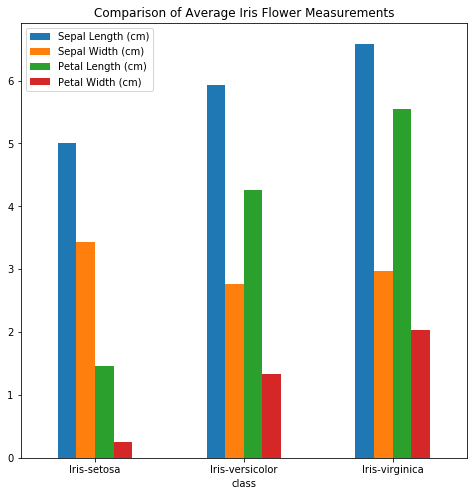

In [8]:
iris_bar_graph = iris_mean_df.plot.bar(rot=0, figsize=(8,8), title="Comparison of Average Iris Flower Measurements")
pp.legend(["Sepal Length (cm)", "Sepal Width (cm)", "Petal Length (cm)", "Petal Width (cm)"])

In [9]:
# Perform one-hot encoding on the 'class' field
encoded_iris_df = pd.get_dummies(iris_df, columns=['class'])

In [10]:
encoded_iris_df

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [11]:
# Create separate output dataframes for each iris class
setosa_values_df = encoded_iris_df['class_Iris-setosa']
versicolor_values_df = encoded_iris_df['class_Iris-versicolor']
virginica_values_df = encoded_iris_df['class_Iris-virginica']

In [12]:
setosa_values_df

0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    0
147    0
148    0
149    0
Name: class_Iris-setosa, Length: 150, dtype: uint8

In [13]:
versicolor_values_df

0      0
1      0
2      0
3      0
4      0
      ..
145    0
146    0
147    0
148    0
149    0
Name: class_Iris-versicolor, Length: 150, dtype: uint8

In [14]:
virginica_values_df

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: class_Iris-virginica, Length: 150, dtype: uint8

In [15]:
# Remove output fields from the data set
del encoded_iris_df['class_Iris-setosa']
del encoded_iris_df['class_Iris-versicolor']
del encoded_iris_df['class_Iris-virginica']

In [16]:
# Create arrays for the features and each of the output classes
X = encoded_iris_df.values

y_setosa = setosa_values_df.values
y_versicolor = versicolor_values_df.values
y_virginica = virginica_values_df.values

In [17]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [18]:
y_setosa

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [19]:
y_versicolor

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [20]:
y_virginica

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [21]:
# Shuffle each output data set and split them into training and test data sets
X_setosa_train, X_setosa_test, y_setosa_train, y_setosa_test = model_selection.train_test_split(X, y_setosa, test_size=0.3)
X_versicolor_train, X_versicolor_test, y_versicolor_train, y_versicolor_test = model_selection.train_test_split(X, y_versicolor, test_size=0.3)
X_virginica_train, X_virginica_test, y_virginica_train, y_virginica_test = model_selection.train_test_split(X, y_virginica, test_size=0.3)

In [22]:
X_setosa_train

array([[5.8, 2.8, 5.1, 2.4],
       [4.6, 3.4, 1.4, 0.3],
       [7.7, 3. , 6.1, 2.3],
       [5. , 3.4, 1.5, 0.2],
       [6.7, 3. , 5.2, 2.3],
       [5.3, 3.7, 1.5, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [5.1, 3.4, 1.5, 0.2],
       [5.7, 2.8, 4.5, 1.3],
       [6.2, 2.8, 4.8, 1.8],
       [5. , 2.3, 3.3, 1. ],
       [6.1, 2.9, 4.7, 1.4],
       [5.7, 3. , 4.2, 1.2],
       [5.5, 2.3, 4. , 1.3],
       [5.5, 3.5, 1.3, 0.2],
       [6.6, 3. , 4.4, 1.4],
       [6.3, 2.3, 4.4, 1.3],
       [5. , 3.2, 1.2, 0.2],
       [5.1, 3.5, 1.4, 0.2],
       [6.6, 2.9, 4.6, 1.3],
       [5.4, 3.7, 1.5, 0.2],
       [6.4, 2.9, 4.3, 1.3],
       [6.8, 3. , 5.5, 2.1],
       [4.9, 2.4, 3.3, 1. ],
       [6.3, 2.5, 4.9, 1.5],
       [6.5, 3.2, 5.1, 2. ],
       [6.3, 2.9, 5.6, 1.8],
       [7. , 3.2, 4.7, 1.4],
       [5.1, 3.7, 1.5, 0.4],
       [6. , 2.2, 5. , 1.5],
       [4.4, 3.2, 1.3, 0.2],
       [5.7, 3.8, 1.7, 0.3],
       [4.3, 3. , 1.1, 0.1],
       [5.2, 3.5, 1.5, 0.2],
       [5.6, 2

In [23]:
y_setosa_train

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=uint8)

In [24]:
# Create a model for each iris class
setosa_model = ensemble.GradientBoostingRegressor(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=6,
    min_samples_leaf=9,
    max_features=0.1,
    loss='huber'
)

versicolor_model = ensemble.GradientBoostingRegressor(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=6,
    min_samples_leaf=9,
    max_features=0.1,
    loss='huber'
)

virginica_model = ensemble.GradientBoostingRegressor(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=6,
    min_samples_leaf=9,
    max_features=0.1,
    loss='huber'
)

In [25]:
train_model("setosa", setosa_model, X_setosa_train, y_setosa_train)
train_model("versicolor", versicolor_model, X_versicolor_train, y_versicolor_train)
train_model("virginica", virginica_model, X_virginica_train, y_virginica_train)

In [26]:
calculate_mean_absolute_error("Setosa", setosa_model, X_setosa_train, y_setosa_train, X_setosa_test, y_setosa_test)
calculate_mean_absolute_error("Versicolor", versicolor_model, X_versicolor_train, y_versicolor_train, X_versicolor_test, y_versicolor_test)
calculate_mean_absolute_error("Virginica", virginica_model, X_virginica_train, y_virginica_train, X_virginica_test, y_virginica_test)

Setosa training set mean absolute error: 0.01
Setosa test set mean absolute error: 0.02

Versicolor training set mean absolute error: 0.03
Versicolor test set mean absolute error: 0.07

Virginica training set mean absolute error: 0.03
Virginica test set mean absolute error: 0.07



In [27]:
# Create sample iris data
setosa_iris = [
    5.0,
    3.3,
    1.4,
    0.2
]

versicolor_iris = [
    6.7,
    3.2,
    4.6,
    1.45
]

virginica_iris = [
    6.05,
    3.0,
    5.55,
    2.2
]

In [28]:
irises_to_classify = [setosa_iris, versicolor_iris, virginica_iris]

In [29]:
setosa_classification = setosa_model.predict(irises_to_classify)
versicolor_classification = versicolor_model.predict(irises_to_classify)
virginica_classification = virginica_model.predict(irises_to_classify)

In [30]:
setosa_classification

array([ 0.99931334,  0.00690258, -0.00745994])

In [31]:
versicolor_classification

array([-0.00121519,  1.04092388, -0.15157599])

In [32]:
virginica_classification

array([ 0.0067319 , -0.05484298,  1.18181177])